### Image processing and Feature extraction

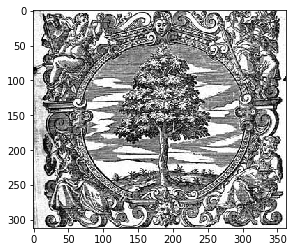

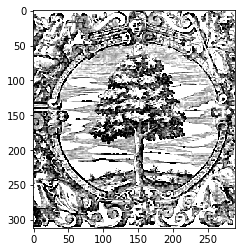

In [86]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
from skimage.measure import regionprops
from skimage.filters.rank import otsu
from skimage.filters import threshold_otsu
from skimage.segmentation import chan_vese
from skimage.morphology import disk
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import diameter_closing
from skimage.filters import rank, hessian
from scipy import ndimage as ndi
from skimage.segmentation import watershed, chan_vese
import pandas as pd
from skimage import img_as_bool, img_as_float, img_as_ubyte, io, color, feature, exposure, filters
import os


img = cv2.imread('imgs/0000214b.jpg',0)

plt.imshow(img, cmap='gray')
plt.show()

p2, p98 = np.percentile(img, (10, 60))
img = exposure.rescale_intensity(img, in_range=(p2, p98))


y = int(img.shape[0]/2)
x = int(img.shape[1]/2)

if(img.shape[0] > img.shape[1]): #vertical
    img = img[:,int(x*0.1):int(x*2)]
else:
    img = img[:,int(x*0.2):int(x*1.8)]

#img = img[:,:-int(img.shape[1]*0.1)]

#t_glob_otsu = threshold_otsu(img)
#img = img >= t_glob_otsu

edges = filters.sobel(img)
lowt = (edges > 0.65).astype(bool)

# mask = hessian(img,sigmas=range(1, 8, 1))
# mask = dilation(mask, disk(1))
# mask = erosion(mask, disk(4))
#mask = img_as_bool(lowt)


img[lowt] = 0
img = filters.median(img, disk(1))

#t_glob_otsu = threshold_otsu(img)
#img = img >= t_glob_otsu

img = img_as_ubyte(img)
plt.imshow(img, cmap=plt.cm.gray)
#plt.imshow(labels, cmap=plt.cm.nipy_spectral, alpha=.7)
plt.show()

In [265]:
df = pd.read_pickle('data_processing.pkl') 
df.head()

,tag,filepath,autor,tag_bina
0,"(tronc, destral)",10247993a.jpg,Dolet Étienne 1509-1546,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"(tronc, destral)",10247993b.jpg,Dolet Étienne 1509-1546,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"(escorpi, aguila)",0127615a.jpg,Nájera Esteban de,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
3,"(ancora, dofi)",0076522a.jpg,Manuzio Paolo 1512-1574,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"(ancora, dofi)",0076522b.jpg,Manuzio Paolo 1512-1574,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [266]:
filename = os.path.splitext(df['filepath'][20])[0]
print(filename)

11601784a


In [267]:
for index,row in df.iterrows():
    try:
        
        img = cv2.imread('imgs/'+row['filepath'],0)
        y = int(img.shape[0]/2)
        x = int(img.shape[1]/2)
        
        p1, p2 = np.percentile(img, (10, 55))
        img = exposure.rescale_intensity(img, in_range=(p1, p2))

        if(img.shape[0] > img.shape[1]): #vertical
            img = img[:,int(x*0.1):int(x*2)]
        else:
            img = img[:,int(x*0.2):int(x*1.8)]

        filename = os.path.splitext(row['filepath'])[0]
        
        edges = filters.sobel(img)
        lowt = (edges > 0.65).astype(bool)
        img[lowt] = 0
        
        
        img = filters.median(img, disk(1))
    
        cv2.imwrite('p_imgs/'+filename+''+str(index)+'.jpg', img_as_ubyte(img))

        df.loc[index,'processed_image'] = filename+''+str(index)+'.jpg'
    except OSError as e:
        df.loc[index,'processed_image'] = ''
    except AttributeError as e:
         df.loc[index,'processed_image'] = ''

In [268]:
empty_index = df[df['processed_image'] == ''].index
df = df.drop(empty_index)
df = df.reset_index(drop=True)

df.to_pickle('processed_image.pkl')

In [34]:
df = pd.read_pickle('processed_image.pkl')
print(len(df))
df.head()

3070


,tag,filepath,autor,tag_bina,processed_image
0,"(tronc, destral)",10247993a.jpg,Dolet Étienne 1509-1546,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",10247993a0.jpg
1,"(tronc, destral)",10247993b.jpg,Dolet Étienne 1509-1546,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",10247993b1.jpg
2,"(escorpi, aguila)",0127615a.jpg,Nájera Esteban de,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",0127615a2.jpg
3,"(ancora, dofi)",0076522a.jpg,Manuzio Paolo 1512-1574,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0076522a3.jpg
4,"(ancora, dofi)",0076522b.jpg,Manuzio Paolo 1512-1574,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0076522b4.jpg


In [22]:
from keras.applications.vgg19 import VGG19
from keras.applications import vgg19
from keras import models, Model
from keras.preprocessing.image import load_img, img_to_array, save_img
from keras.models import load_model
from keras.applications.vgg19 import preprocess_input

Using TensorFlow backend.


In [23]:
model = VGG19()

for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	print(i, layer.name, layer.output.shape)

Instructions for updating:
Colocations handled automatically by placer.
1 block1_conv1 (?, 224, 224, 64)
2 block1_conv2 (?, 224, 224, 64)
4 block2_conv1 (?, 112, 112, 128)
5 block2_conv2 (?, 112, 112, 128)
7 block3_conv1 (?, 56, 56, 256)
8 block3_conv2 (?, 56, 56, 256)
9 block3_conv3 (?, 56, 56, 256)
10 block3_conv4 (?, 56, 56, 256)
12 block4_conv1 (?, 28, 28, 512)
13 block4_conv2 (?, 28, 28, 512)
14 block4_conv3 (?, 28, 28, 512)
15 block4_conv4 (?, 28, 28, 512)
17 block5_conv1 (?, 14, 14, 512)
18 block5_conv2 (?, 14, 14, 512)
19 block5_conv3 (?, 14, 14, 512)
20 block5_conv4 (?, 14, 14, 512)


### First six filters

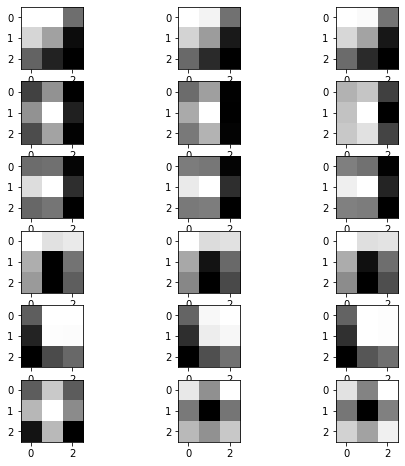

In [24]:
filters, biases = model.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
fig, ax = plt.subplots(nrows=n_filters, ncols=3, figsize=[8,8])

for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# plot filter channel in grayscale
		ax[i][j].imshow(f[:, :, j], cmap='gray')
		#ix += 1
# show the figure
plt.show()

In [25]:
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Podemos obersevar los filtros aplicados a la imagen y resultados que se obtienen en las diferentes capas de convulucion. Podemos ver que los mapas de características más cercanos a la entrada del modelo capturan muchos detalles finos en la imagen y que a medida que avanzamos en el modelo, los mapas de características muestran cada vez menos detalles.

Esta pauta era de esperar, ya que el modelo abstrae los rasgos de la imagen en conceptos más generales que pueden utilizarse para hacer una clasificación. Aunque no está claro en la imagen final que el modelo haya visto un grifo, generalmente perdemos la capacidad de interpretar estos mapas de características más profundas.

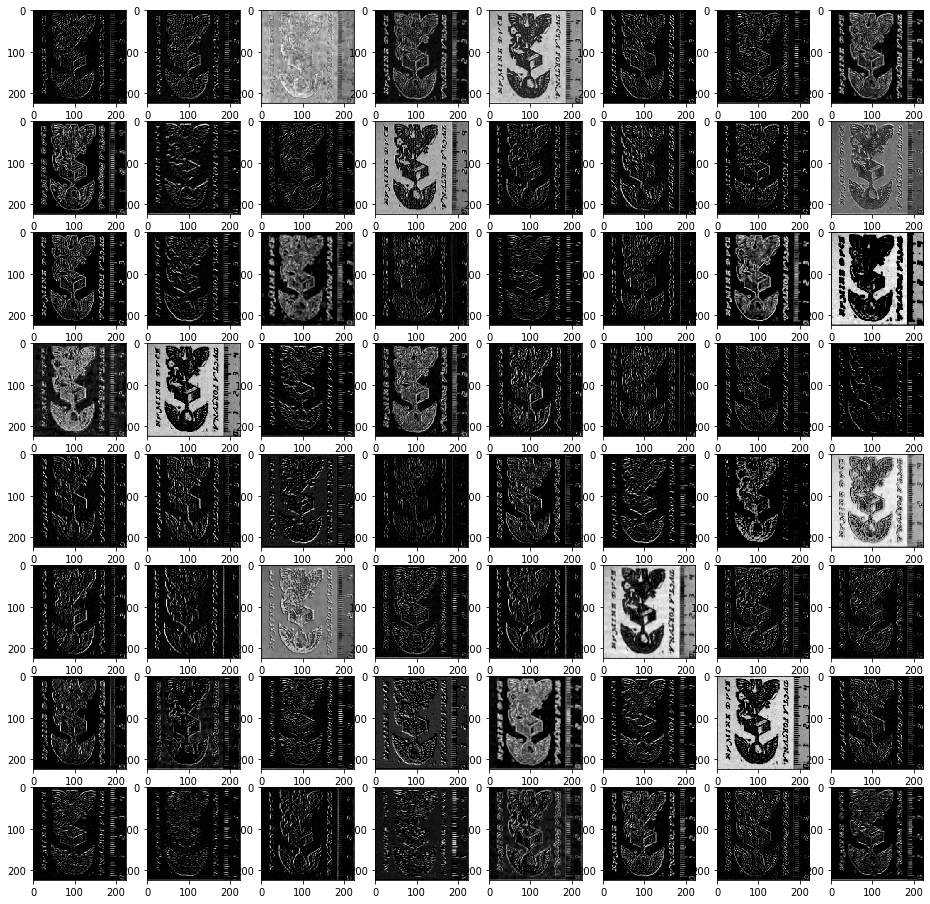

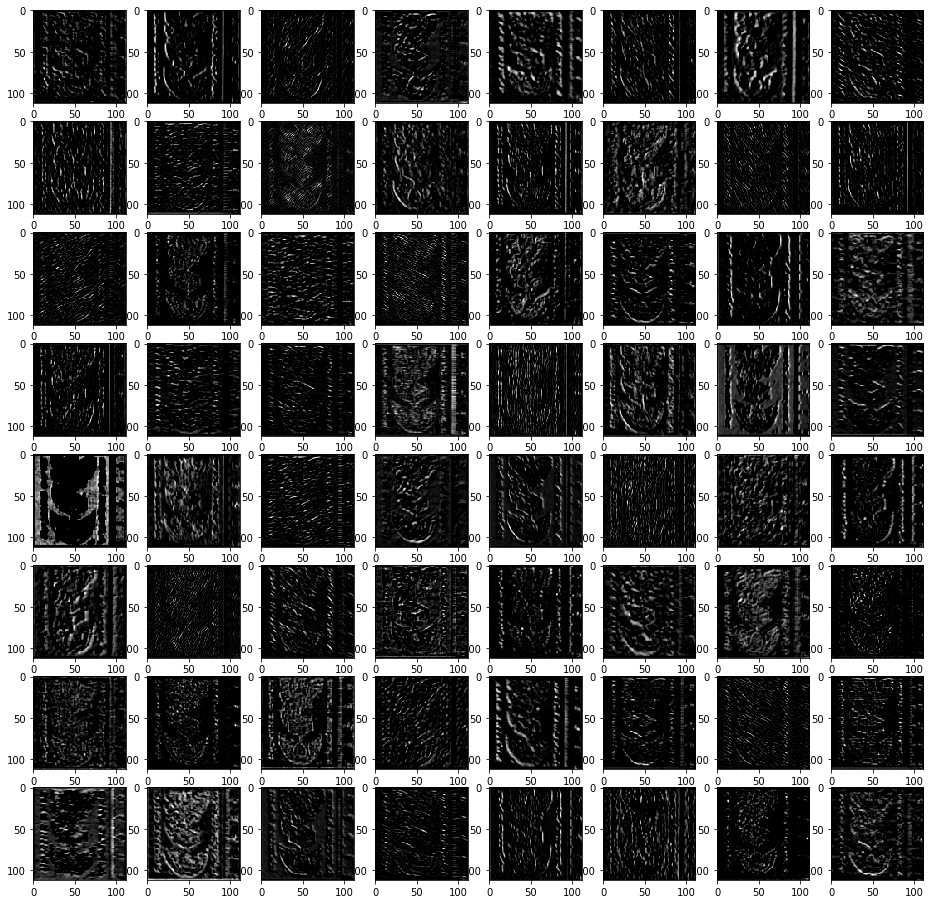

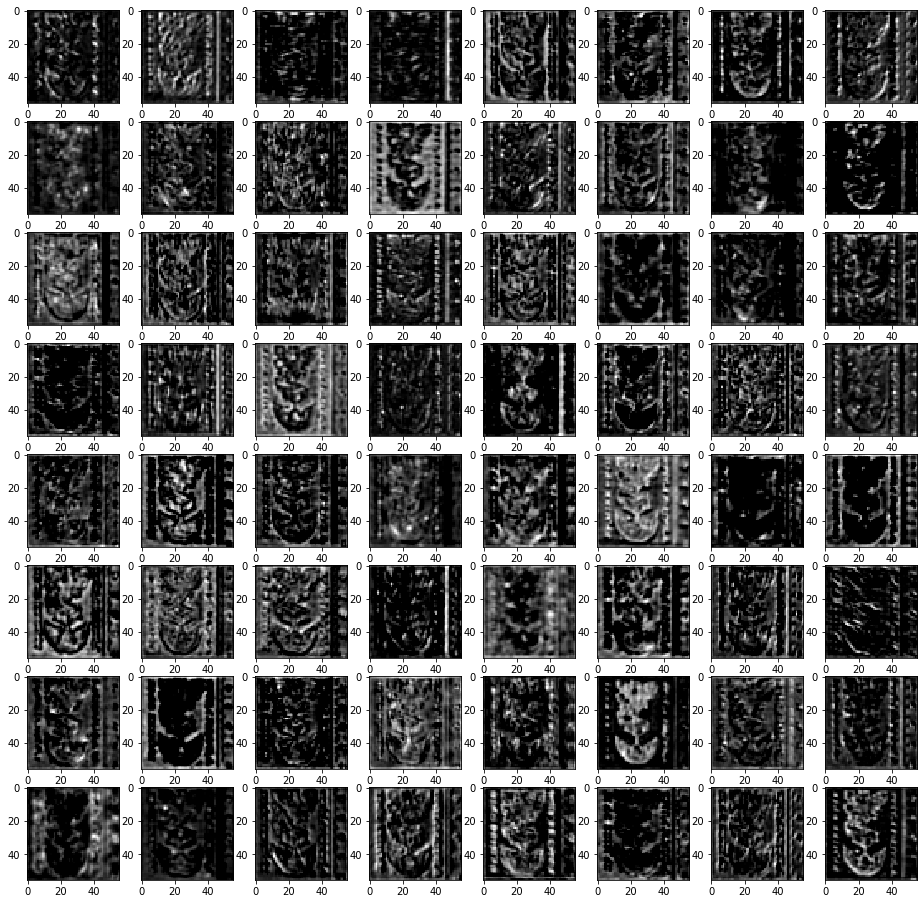

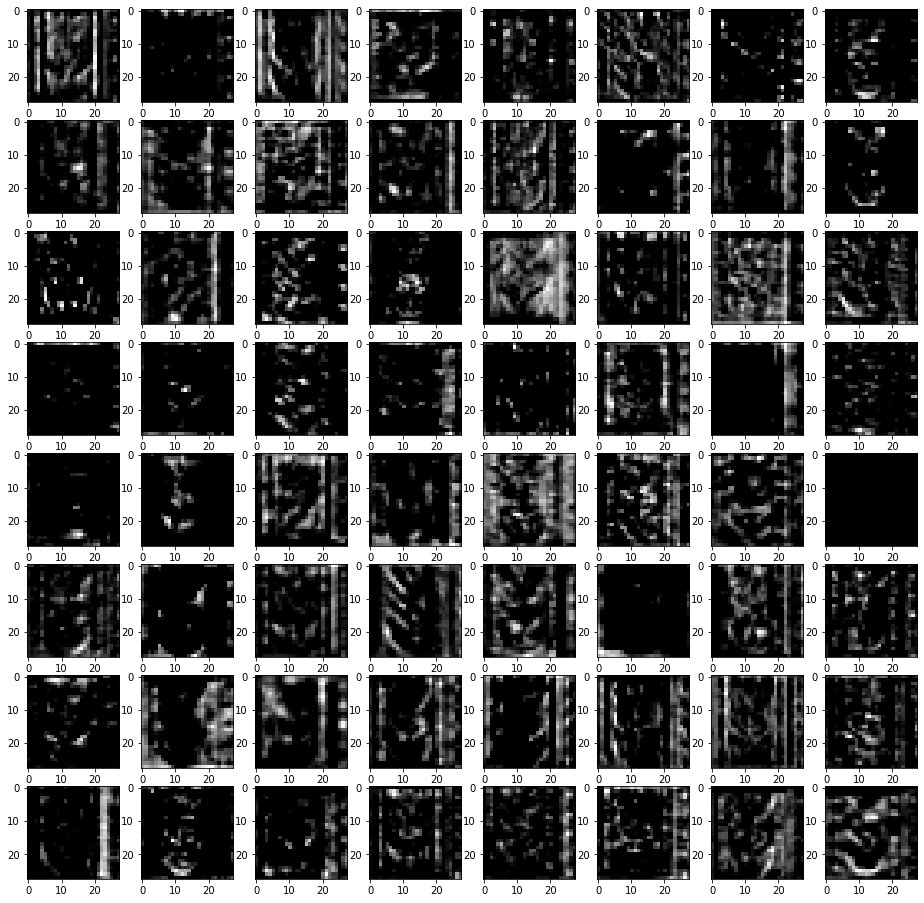

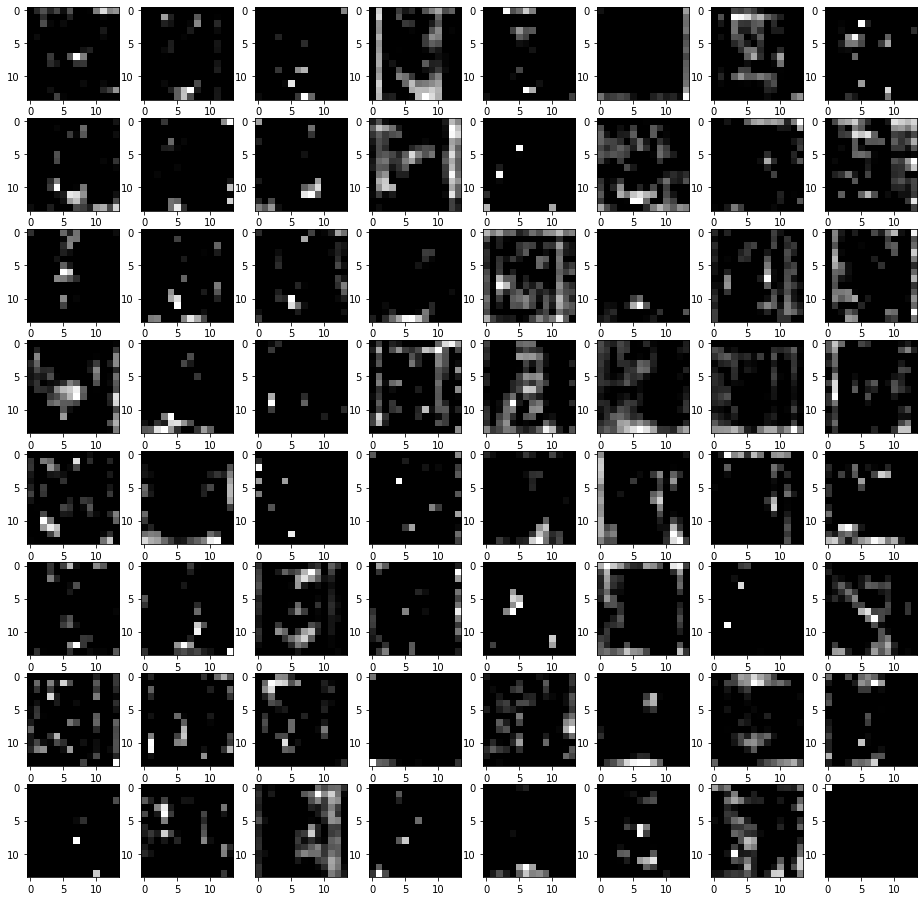

In [27]:
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
img = load_img('imgs/11622799a.jpg', target_size=(224, 224))
img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)
feature_maps = model.predict(img)
square = 8

for fmap in feature_maps:
    
    ix = 1
    fig, ax = plt.subplots(nrows=square, ncols=square, figsize=[16,16])

    for i in range(square):
        for j in range(square):
            # plot filter channel in grayscale
            ax[i][j].imshow(fmap[0, :, :, ix-1], cmap='gray')
            ix += 1
    # show the figure
    plt.show()

In [39]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

model = Model(model.input, model.layers[-2].output)
model.save('vgg19_4096.h5')
model = load_model('vgg19_4096.h5')
df["img"] = [[] for _ in range(len(df))]

for index,row in df.iterrows():

    img = load_img('p_imgs/'+row['processed_image'], target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    pr = model.predict(img)
    flattened_features = pr.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    df.at[index,'img'] = normalized_features

df.head()

,tag,filepath,autor,tag_bina,processed_image,img
0,"(tronc, destral)",10247993a.jpg,Dolet Étienne 1509-1546,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",10247993a0.jpg,"[0.0020063738, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0225..."
1,"(tronc, destral)",10247993b.jpg,Dolet Étienne 1509-1546,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",10247993b1.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.023566265, 0...."
2,"(escorpi, aguila)",0127615a.jpg,Nájera Esteban de,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",0127615a2.jpg,"[0.018019656, 0.07641694, 0.0, 0.0, 0.0, 0.0, ..."
3,"(ancora, dofi)",0076522a.jpg,Manuzio Paolo 1512-1574,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0076522a3.jpg,"[0.017116698, 0.016291304, 0.0, 0.0, 0.0, 0.0,..."
4,"(ancora, dofi)",0076522b.jpg,Manuzio Paolo 1512-1574,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0076522b4.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.026190285, 0...."


In [81]:
df = pd.read_pickle('vgg_exposure_sobel.pkl')

In [82]:
def sift_features(file):
    image = cv2.imread(file)
    vector_size = 32
    try:
        alg = cv2.xfeatures2d.SIFT_create()
        kps = alg.detect(image)
        kps = sorted(kps, key=lambda x: -x.response)[:vector_size]
        kps, dsc = alg.compute(image, kps)
        dsc = dsc.flatten()
        # Making descriptor of same size
        needed_size = (vector_size * 64)
        if dsc.size < needed_size:
            # adding zeros at the end of our feature vector
            dsc = np.concatenate([dsc, np.zeros(needed_size - dsc.size)])
        #dsc = np.abs(dsc)
        dsc = dsc / np.linalg.norm(dsc)
        return dsc
    except cv2.error as e:
        print('Error: ', e)

In [83]:
feats = sift_features('imgs/0076522b.jpg')
print(feats)
print(len(feats))

[0.01346599 0.01381127 0.0113943  ... 0.01035845 0.01691881 0.00034528]
4096


In [84]:
df["img_sift"] = [[] for _ in range(len(df))]

for index,row in df.iterrows():
    df.at[index,'img_sift'] = sift_features('p_imgs/'+row['processed_image'])
df.head()

,tag,filepath,autor,tag_bina,processed_image,img,img_sift
0,"(tronc, destral)",10247993a.jpg,Dolet Étienne 1509-1546,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",10247993a0.jpg,"[0.0020063738, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0225...","[0.044888694, 0.00034529762, 0.00034529762, 0...."
1,"(tronc, destral)",10247993b.jpg,Dolet Étienne 1509-1546,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",10247993b1.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.023566265, 0....","[0.04419437, 0.039360613, 0.0134654725, 0.0017..."
2,"(escorpi, aguila)",0127615a.jpg,Nájera Esteban de,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",0127615a2.jpg,"[0.018019656, 0.07641694, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0003451907, 0.0034519068, 0.023472967,..."
3,"(ancora, dofi)",0076522a.jpg,Manuzio Paolo 1512-1574,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0076522a3.jpg,"[0.017116698, 0.016291304, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.012425665, 0.026922274, 0.0262319..."
4,"(ancora, dofi)",0076522b.jpg,Manuzio Paolo 1512-1574,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0076522b4.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.026190285, 0....","[0.0034533546, 0.005180032, 0.02279214, 0.0276..."


In [85]:
df.to_pickle('vgg_sift_exposure_sobel.pkl')